# Notebook ICD - 5

## Dataset: Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Descripción del dataset

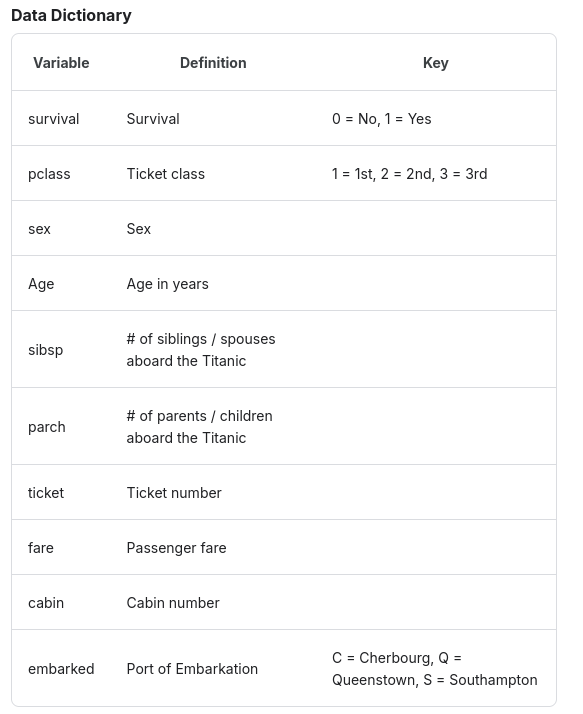

In [3]:
df = pd.read_csv('train.csv')
print(df.head())

   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


### 1. Inspección y exploración de los datos

- Check the data information using df.info()

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None


A partir de la información de los datos anteriores, podemos ver que las columnas de Edad y Cabina tienen un número desigual de registros. Algunas de las columnas son categóricas y tienen el tipo de dato 'objeto', mientras que otras son de tipo entero o valores flotantes. Veamos la estructura descriptiva de los datos utilizando `df.describe()`

Este paso implica comprender los datos inspeccionando su estructura e identificando valores faltantes, valores atípicos e inconsistencias.

- Check the duplicate rows

In [4]:
print(df.duplicated())



0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


In [6]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Check the categorical and numerical columns

In [7]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['name', 'sex', 'ticket', 'cabin', 'embarked']
Numerical columns : ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


Check the total number of unique values in the Categorical columns

In [8]:
df[cat_col].nunique()

name        891
sex           2
ticket      681
cabin       147
embarked      3
dtype: int64

### 2. Eliminación de observaciones no deseadas

Esto incluye eliminar valores duplicados, redundantes o irrelevantes de tu conjunto de datos. Las observaciones duplicadas surgen con mayor frecuencia durante la recolección de datos, y las observaciones irrelevantes son aquellas que en realidad no encajan en el problema específico que estás tratando de resolver.

Las observaciones redundantes alteran la eficiencia en gran medida, ya que los datos se repiten y pueden influir en el lado correcto o incorrecto, lo que produce resultados poco confiables. Las observaciones irrelevantes son cualquier tipo de datos que no nos sirven y pueden eliminarse directamente. Ahora tenemos que tomar una decisión de acuerdo con el tema de análisis, sobre qué factor es importante para nuestra discusión. Como sabemos, nuestras máquinas no entienden los datos en formato de texto. Por lo tanto, debemos eliminar o convertir los valores de las columnas categóricas en tipos numéricos. Aquí vamos a eliminar las columnas de Nombres porque los nombres siempre serán únicos y no tienen una gran influencia en las variables objetivo. Para el boleto, primero imprimamos los 50 boletos únicos.

In [9]:
df['ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

A partir de los boletos anteriores, podemos observar que están compuestos por dos partes, como el primer valor ‘A/5 21171’, que se une de ‘A/5’ y ‘21171’; esto puede influir en nuestras variables objetivo. Este será un caso de ingeniería de características, donde derivamos nuevas características de una columna o un grupo de columnas. En el caso actual, estamos eliminando las columnas de 'Nombre' y 'Boleto'.

Drop Name and Ticket columns

In [11]:
df1 = df.drop(columns=['name','ticket'])
print(df1.shape)

(891, 9)


### 3. Manejo de datos faltantes

Los datos faltantes son un problema común en los conjuntos de datos del mundo real, y pueden ocurrir por diversas razones, como errores humanos, fallos del sistema o problemas de recolección de datos. Se pueden utilizar varias técnicas para manejar los datos faltantes, como la imputación, eliminación o sustitución.

Verifiquemos el porcentaje de valores faltantes columna por columna para cada fila utilizando df.isnull(), que verifica si los valores son nulos o no y devuelve valores booleanos. Luego, .sum() sumará el número total de filas con valores nulos, y dividimos esto por el total de filas presentes en el conjunto de datos, multiplicando luego para obtener los valores en porcentaje, es decir, cuántos valores son nulos por cada 100 valores.


In [12]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

survived     0.00
pclass       0.00
sex          0.00
age         19.87
sibsp        0.00
parch        0.00
fare         0.00
cabin       77.10
embarked     0.22
dtype: float64

No podemos simplemente ignorar o eliminar las observaciones faltantes. Deben manejarse con cuidado, ya que pueden ser un indicio de algo importante.

Las dos formas más comunes de tratar los datos faltantes son:

   - Eliminar observaciones con valores faltantes.
        El hecho de que el valor esté ausente puede ser informativo en sí mismo.
   -  Además, en el mundo real, a menudo necesitas hacer predicciones sobre nuevos datos, incluso si algunas de las características están faltando.

Como podemos ver en el resultado anterior, la columna de Cabina tiene un 77% de valores nulos, la Edad tiene un 19.87% y Embarque tiene un 0.22% de valores nulos. Por lo tanto, no es una buena idea completar el 77% de los valores nulos. Así que, eliminaremos la columna de Cabina. La columna de Embarque tiene solo un 0.22% de valores nulos, así que eliminaremos las filas con valores nulos de la columna de Embarque.

In [13]:
print("Before: ", df1.shape)
df2 = df1.drop(columns='cabin')
df2.dropna(subset=['embarked'], axis=0, inplace=True)
print("After: ", df2.shape)

Before:  (891, 9)
After:  (889, 8)


2. Imputación de los valores faltantes a partir de observaciones pasadas.

  -  Nuevamente, la "ausencia" de valores suele ser informativa en sí misma, y deberías informar a tu algoritmo si un valor estaba ausente.
  -  Incluso si construyes un modelo para imputar tus valores, no estás agregando información real; solo estás reforzando los patrones ya proporcionados por otras características.

A partir de la tabla descriptiva anterior, podemos ver que hay muy pocas diferencias entre la media y la mediana, es decir, 29.6 y 28. Por lo tanto, aquí podemos optar por la imputación por media o por mediana.

Nota: La imputación por media es adecuada cuando los datos están distribuidos normalmente y no tienen valores atípicos extremos. La imputación por mediana es preferible cuando los datos contienen valores atípicos o están sesgados.

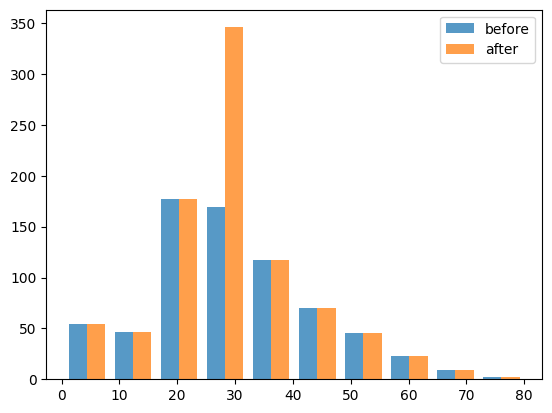

In [14]:
# Mean imputation
df3 = df2.fillna(df2.age.mean())
# Let's check the null values again
df3.isnull().sum()

plt.hist([df2.age,df3.age], alpha=0.75, label=['before','after'])
plt.legend(loc='upper right')
plt.show()

### 4. Manejo de valores atípicos:

Los valores atípicos son valores extremos que se desvían significativamente de la mayoría de los datos. Pueden afectar negativamente el análisis y el rendimiento del modelo. Se pueden utilizar técnicas como agrupamiento, interpolación o transformación para manejar los valores atípicos.

Para verificar los valores atípicos, generalmente utilizamos un diagrama de caja. Un diagrama de caja, también conocido como diagrama de caja y bigotes, es una representación gráfica de la distribución de un conjunto de datos. Muestra la mediana, los cuartiles y los posibles valores atípicos de una variable. La línea dentro de la caja denota la mediana, mientras que la caja en sí representa el rango intercuartílico (IQR). Los bigotes se extienden hasta los valores no atípicos más extremos dentro de 1.5 veces el IQR. Los puntos individuales más allá de los bigotes se consideran posibles valores atípicos. Un diagrama de caja ofrece una visión fácil de entender del rango de los datos y permite identificar valores atípicos o sesgos en la distribución.

Vamos a trazar el diagrama de caja para los datos de la columna de Edad.

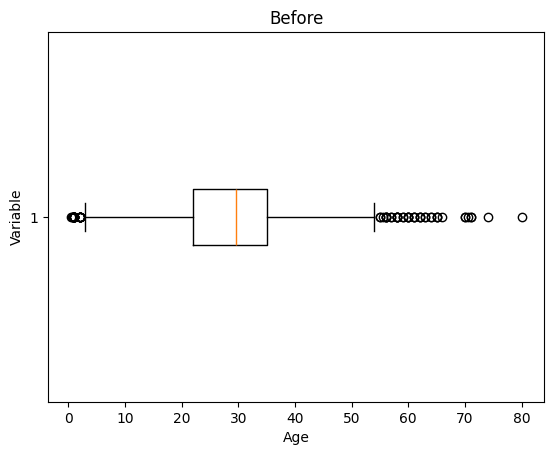

In [15]:
import matplotlib.pyplot as plt
plt.boxplot(df3['age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Before')
plt.show()

Como podemos ver en el diagrama de caja y bigotes anterior, nuestro conjunto de datos de edad tiene valores atípicos. Los valores menores de 5 y mayores de 55 son valores atípicos.

In [16]:
# calculate summary statistics
mean = df3['age'].mean()
std  = df3['age'].std()
 
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df4 = df3[(df3['age'] >= lower_bound)
                & (df3['age'] <= upper_bound)]

Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


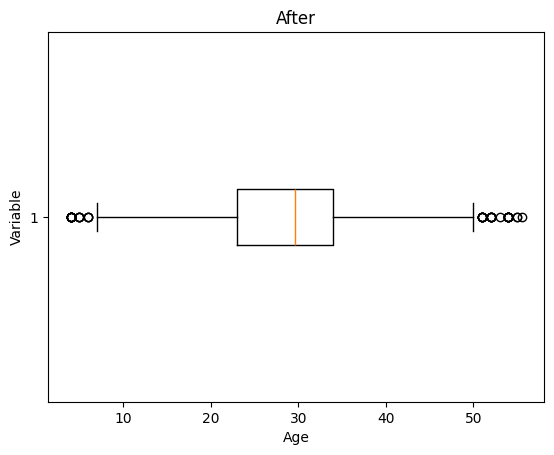

In [17]:
plt.boxplot(df4['age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('After')
plt.show()

Similarly, we can remove the outliers of the remaining columns.


### 5. Transformación de datos

La transformación de datos implica convertir los datos de una forma a otra para hacerlos más adecuados para el análisis. Se pueden utilizar técnicas como normalización, escalado o codificación para transformar los datos.

 -   Validación y verificación de datos: La validación y verificación de datos implican asegurar que los datos sean precisos y consistentes al compararlos con fuentes externas o con el conocimiento de expertos.

Para la predicción en aprendizaje automático, primero separamos las características independientes de las características objetivo. Aquí consideraremos solo ‘Sexo’, ‘Edad’, ‘SibSp’, ‘Parch’, ‘Tarifa’ y ‘Embarque’ como características independientes, y ‘Sobrevivió’ como la variable objetivo. Esto se debe a que el 'PassengerId' no afectará la tasa de supervivencia.

In [18]:
X = df3[['pclass','sex','age', 'sibsp','parch','fare','embarked']]
Y = df3['survived']

In [19]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


- Formateo de datos: El formateo de datos implica convertir los datos en un formato o estructura estándar que pueda ser procesada fácilmente por los algoritmos o modelos utilizados para el análisis. Aquí discutiremos técnicas comunes de formateo de datos, es decir, escalado y normalización.

  
**Escalado:**

El escalado implica transformar los valores de las características a un rango específico. Mantiene la forma de la distribución original mientras cambia la escala. El escalado es particularmente útil cuando las características tienen diferentes escalas y ciertos algoritmos son sensibles a la magnitud de las características. Los métodos comunes de escalado incluyen el escalado Min-Max y la estandarización (escalado Z-score).

Escalado Min-Max: El escalado Min-Max reescala los valores a un rango especificado, típicamente entre 0 y 1. Preserva la distribución original y asegura que el valor mínimo se mapee a 0 y el valor máximo se mapee a 1.

In [20]:
from sklearn.preprocessing import MinMaxScaler
 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

/tmp/ipykernel_4720/3649388838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


**Transformaciones** 
- standar
- mimax
- maxabs
- quartile